In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
pwd

'C:\\Users\\IBS'

In [5]:
data=pd.read_csv('analytics.csv')

In [7]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0.38,0.53,2,157,3,0,1,0,sales,low,NaN,NaN,NaN
1,0.80,0.86,5,262,6,0,1,0,sales,medium,NaN,NaN,NaN
2,0.11,0.88,7,272,4,0,1,0,sales,medium,NaN,NaN,NaN
3,0.72,0.87,5,223,5,0,1,0,sales,low,NaN,NaN,NaN
4,0.37,0.52,2,159,3,0,1,0,sales,low,NaN,NaN,NaN
5,0.41,0.50,2,153,3,0,1,0,sales,low,NaN,NaN,NaN
6,0.10,0.77,6,247,4,0,1,0,sales,low,NaN,NaN,NaN
7,0.92,0.85,5,259,5,0,1,0,sales,low,NaN,NaN,NaN
8,0.89,1.00,5,224,5,0,1,0,sales,low,NaN,NaN,NaN
9,0.42,0.53,2,142,3,0,1,0,sales,low,NaN,NaN,


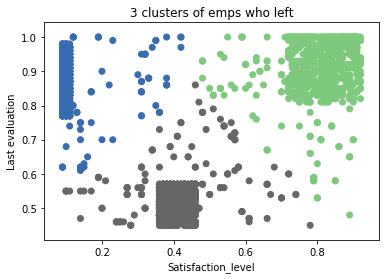

In [11]:
#import module
from sklearn.cluster import KMeans

#Filter data
left_emp=data[['satisfaction_level','last_evaluation']][data.left==1]

#create groups using K-means clustering
kmeans=KMeans(n_clusters=3,random_state=0).fit(left_emp)

#add new column "label and assign cluster labels"
left_emp['label']=kmeans.labels_

#draw scatter plot
plt.scatter(left_emp['satisfaction_level'],left_emp['last_evaluation'],c=left_emp['label'],cmap='Accent')
plt.xlabel('Satisfaction_level')
plt.ylabel('Last evaluation')
plt.title('3 clusters of emps who left')
plt.show()

In [15]:
#Building prediction model

#import label encoder
from sklearn import preprocessing

#creating label encoder
le=preprocessing.LabelEncoder()

#Converting string labels into numbers 
data['salary']=le.fit_transform(data['salary'])
data['Departments ']=le.fit_transform(data['Departments '])

#view the dataset created 
data
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0.38,0.53,2,157,3,0,1,0,7,1,NaN,NaN,NaN
1,0.80,0.86,5,262,6,0,1,0,7,2,NaN,NaN,NaN
2,0.11,0.88,7,272,4,0,1,0,7,2,NaN,NaN,NaN
3,0.72,0.87,5,223,5,0,1,0,7,1,NaN,NaN,NaN
4,0.37,0.52,2,159,3,0,1,0,7,1,NaN,NaN,NaN


In [22]:
#splitting data into feature and 

X=data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years','Departments ','salary']]
y=data['left']

In [24]:
# import train_test_split function 

from sklearn.model_selection import train_test_split

#split data set into training set and testing set 

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

X_test
print(X_test)

       satisfaction_level  last_evaluation  number_project  \
6723                 0.65             0.96               5   
6473                 0.88             0.80               3   
4679                 0.69             0.98               3   
862                  0.41             0.47               2   
7286                 0.87             0.76               5   
8127                 0.72             0.88               3   
3017                 0.98             0.78               4   
3087                 0.17             0.76               4   
6425                 0.20             0.98               4   
2250                 0.16             0.90               5   
542                  0.77             0.91               5   
9293                 0.67             0.71               4   
11723                0.54             0.78               3   
4923                 0.77             0.88               2   
12070                0.74             0.99               2   
10602   

In [25]:
#Import Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

#rename the gradient boosting classifier as "gb"
gb=GradientBoostingClassifier()

#train the model using the training sets 
gb.fit(X_train,y_train)

#predict the response for test dataset
y_pred=gb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [27]:
from sklearn.ensemble import GradientBoostingClassifier

In [28]:
gb=GradientBoostingClassifier()

In [29]:
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [31]:
y_pred=gb.predict(X_test)

In [34]:
pwd


'C:\\Users\\IBS'

In [38]:
Data1=pd.read_csv("NEW.csv")

In [39]:
Data1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,0,7,0
1,0.80,0.86,5,262,6,0,0,7,2
2,0.58,0.74,4,215,3,0,0,7,1


In [40]:
y_pred=gb.predict(Data1)
print(y_pred)

[1 1 0]


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
from sklearn import preprocessing

Data2=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
Data2.head(6)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6


In [47]:
#import label encoder
from sklearn import preprocessing

#creating label encoder
le=preprocessing.LabelEncoder()

In [51]:
#Converting string labels into numbers 
Data2['Attrition']=le.fit_transform(Data2['Attrition'])
Data2['Department']=le.fit_transform(Data2['Department'])
Data2['BusinessTravel']=le.fit_transform(Data2['BusinessTravel'])
Data2['EducationField']=le.fit_transform(Data2['EducationField'])


Attrition=Data2.groupby('Attrition')
Attrition.mean()



,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
0,37.561233,1.607461,812.504461,1.245742,8.915653,2.927007,2.231955,1.0,1027.656123,2.771290,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
1,33.607595,1.607595,750.362869,1.337553,10.632911,2.839662,2.329114,1.0,1010.345992,2.464135,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


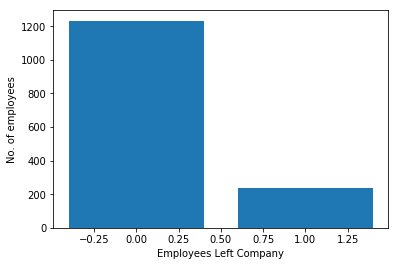

In [52]:
Attrition_count=Data2.groupby('Attrition').count()
plt.bar(Attrition_count.index.values,Attrition_count['RelationshipSatisfaction'])
plt.xlabel('Employees Left Company')
plt.ylabel('No. of employees')
plt.show()

In [63]:
from sklearn.cluster import KMeans
Data2.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [68]:
#Filter data
left_emp=Data2[['MonthlyIncome','HourlyRate']][Data2.Attrition==1]

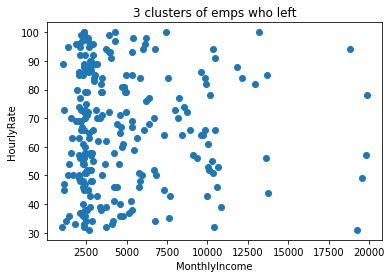

In [70]:
kmeans=KMeans(n_clusters=3,random_state=0).fit(left_emp)

#add new column "label and assign cluster labels"
left_emp['label']=kmeans.labels_

#draw scatter plot
plt.scatter(left_emp['MonthlyIncome'],left_emp['HourlyRate'])
plt.xlabel('MonthlyIncome')
plt.ylabel('HourlyRate')
plt.title('3 clusters of emps who left')
plt.show()
